In [1]:
import pandas as pd
import numpy as np

## 1. Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [2]:
#pull in the csv data.
attendance = pd.read_csv("/Users/hector/codeup-data-science/classification-exercises/untidy-data/attendance.csv")
attendance.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [3]:
#melt into three columns.
attendance = attendance.melt(id_vars=['Unnamed: 0'], var_name='date', value_name='attendance')
attendance.head()

,Unnamed: 0,date,attendance
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [5]:
#create calculation function.
def attendance_percentage(a):
    if a == 'P':
        return 1
    elif a == 'H':
        return 0.5
    elif a == 'T':
        return 0.9
    else:
        return 0

In [8]:
#run the function.
attendance['att_per'] = attendance['attendance'].apply(attendance_percentage)
attendance.head()

,Unnamed: 0,date,attendance,att_per
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [10]:
#This was done to rename the first column, but had to rename all the columns for it to work.
attendance.columns = ['name', 'date', 'attendance', 'attendance_percentage']
attendance.head()

,name,date,attendance,attendance_percentage
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [13]:
#groupby student and get the mean by attendance.
attendance.groupby('name').attendance_percentage.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: attendance_percentage, dtype: float64

## 2. Coffee Levels
    a. Read the coffee_levels.csv file.
    b. Transform the data so that each carafe is in it's own column.
    c. Is this the best shape for the data?

###  a. Read the coffee_levels.csv file.

In [18]:
#pull in the csv data.
coffee_lv = pd.read_csv("/Users/hector/codeup-data-science/classification-exercises/untidy-data/coffee_levels.csv")
coffee_lv

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


### b. Transform the data so that each carafe is in it's own column.

In [28]:
#melt into carafe columns.
coffee_pivot = coffee_lv.pivot(index='hour', columns='coffee_carafe')
coffee_pivot

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928
11                 0.335533  0.235529  0.311495
12                 0.898291  0.017009  0.771947
13                 0.310711  0.997464  0.398520
14                 0.507288  0.058361  0.864464
15                 0.215043  0.144644  0.436364
16                 0.183891  0.544676  0.280621
17                 0.391560  0.594126  0.436677

### c. Is this the best shape for the data?

<AxesSubplot:xlabel='hour'>

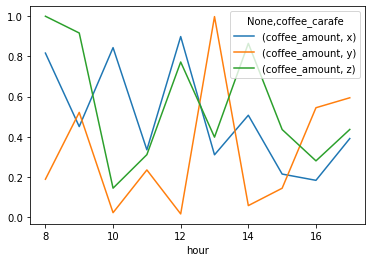

In [29]:
coffee_pivot.plot()

## 3. Cake Recipes

    a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
    b. Tidy the data as necessary.
    c. Which recipe, on average, is the best? recipe b
    d. Which oven temperature, on average, produces the best results? 275
    e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

### a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [30]:
cake = pd.read_csv("/Users/hector/codeup-data-science/classification-exercises/untidy-data/cake_recipes.csv")
cake.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


### b. Tidy the data as necessary.

In [56]:
#split and rename "recipe:position"
r_p = cake['recipe:position'].str.split(":", expand = True)
r_p.columns=['recipe','position']
r_p

,recipe,position
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [58]:
#concatenate the split with the main df. remove "recipe:position" from df.
cake_r = pd.concat([cake, r_p], axis=1).drop(columns='recipe:position')
cake_r

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [60]:
#melt
cake_melt = cake_r.melt(id_vars=['recipe','position'], var_name='temperature', value_name='value')
cake_melt.head()

,recipe,position,temperature,value
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


###  c. Which recipe, on average, is the best? recipe b

In [62]:
cake_melt.groupby('recipe').value.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: value, dtype: float64

### d. Which oven temperature, on average, produces the best results? 275

In [64]:
cake_melt.groupby('temperature').value.mean()

temperature
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: value, dtype: float64

### e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [66]:
cake_melt.groupby(['temperature', 'recipe', 'position']).value.mean()

temperature  recipe  position
225          a       bottom      61.738655
                     top         51.709751
             b       bottom      57.095320
                     top         82.455004
             c       bottom      96.470207
                     top         71.306308
             d       bottom      52.799753
                     top         96.873178
250          a       bottom      53.912627
                     top         52.009735
             b       bottom      61.904369
                     top         95.224151
             c       bottom      52.001358
                     top         82.795477
             d       bottom      58.670419
                     top         76.101363
275          a       bottom      74.414730
                     top         68.576858
             b       bottom      61.196980
                     top         98.594881
             c       bottom      92.893227
                     top         92.098049
             d       bot

In [68]:
best_comb = cake_melt.groupby(['temperature', 'recipe', 'position']).value.mean().idxmax()
best_score = cake_melt.groupby(['temperature', 'recipe', 'position']).value.mean().max()
print(f' The best combination is \'{best_comb}\' with score of {round(best_score, 1)}')

 The best combination is '('300', 'b', 'bottom')' with score of 99.2
